In [1]:
!ls

INPUT_Pos.csv    InputFinal.ipynb


## Global Imports

In [2]:
!pip install lightgbm


import numpy as np
# import seaborn as sns
# sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd

from numpy.random import seed
# from tensorflow import set_random_seed

# from keras.layers import Input, Dropout
# from keras.layers.core import Dense 
# from keras.models import Model, Sequential, load_model
# from keras import regularizers

seed(10)
# set_random_seed(10)

## Load Data

In [3]:
!ls

INPUT_Pos.csv    InputFinal.ipynb


In [4]:
fileName = 'INPUT_Pos.csv'
dataset = pd.read_csv(fileName, header=None, engine='python')
dataset.shape

(26673, 211)

In [5]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,25.0,-7.6200,25.0,-4.070,10.70,25.0,-2.06,1.860,15.2,25.0,...,-12.00,18.4,10.10,-3.84,-10.10,6.920,3.37,9.05,25.0,1
1,25.0,-10.2000,25.0,-11.200,11.20,25.0,-6.07,3.550,16.3,25.0,...,-17.10,18.2,20.40,-11.60,-13.90,8.020,6.08,16.00,25.0,1
2,25.0,-5.7900,25.0,2.110,9.63,25.0,1.36,4.580,20.4,25.0,...,-13.70,19.4,6.51,-5.10,-4.98,7.310,-3.83,1.25,25.0,1
3,25.0,-1.4900,25.0,-0.941,8.97,25.0,-2.13,1.880,16.0,25.0,...,-9.01,17.2,8.98,-6.04,-11.20,-0.559,6.83,5.77,25.0,1
4,25.0,-0.0711,25.0,-4.850,9.32,25.0,-5.97,-0.816,16.4,25.0,...,-10.70,16.6,12.90,-4.73,-7.83,5.500,-0.98,3.73,25.0,1


In [6]:
dataset.isnull().any().any()

True

In [7]:
dataset.fillna(1, inplace=True)

In [8]:
dataset.isnull().any().any()

False

In [9]:
shortCol = []
columns = dataset.columns.tolist()
for i in columns:
  if(dataset[i].nunique() != 1):
    shortCol.append(i)
    #print(i, ": ", dataset[i].nunique())

In [10]:
ttl_data = dataset.iloc[:, shortCol].values
np.random.shuffle(ttl_data)
ttl_data.shape

(26673, 211)

In [11]:
ttl_data[ttl_data[:, -1] == 1].shape

(12646, 211)

In [12]:
ttl_data[ttl_data[:, -1] == 0].shape

(14027, 211)

## Separate Positives & Negatives

In [13]:
pos = ttl_data[ttl_data[:, -1] == 1]
np.random.shuffle(pos)
neg = ttl_data[ttl_data[:, -1] == 0]
np.random.shuffle(neg)

In [14]:
### auto-encoder data ###

# tstSize = 150
# p_test = pos[0:tstSize, ...]
# n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
# test = np.vstack((p_test, n_test))
# np.random.shuffle(test)
# X_train, X_test, y_train, y_test = n_train[:, :-1], test[:, :-1], n_train[:, -1], test[:, -1]

## Train-Test Split

In [15]:
tstSize = 8002
p_test, p_train = pos[0:tstSize, ...], pos[tstSize:, ...]
n_test, n_train = neg[0:tstSize, ...], neg[tstSize:, ...]
train, test = np.vstack((p_train, n_train)), np.vstack((p_test, n_test))
np.random.shuffle(train)
np.random.shuffle(test)
X_train, X_test, y_train, y_test = train[:, :-1], test[:, :-1], train[:, -1], test[:, -1]

In [16]:

print(y_train.shape)
print(y_train[y_train == 1].shape)
print(y_train[y_train == 0].shape)

print('-'*60)

print(y_test.shape)
print(y_test[y_test == 1].shape)
print(y_test[y_test == 0].shape)

(10669,)
(4644,)
(6025,)
------------------------------------------------------------
(16004,)
(8002,)
(8002,)


## Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Balance Data

In [18]:
### direct undersampling ###

# tstSize = 100
# p_test, p_train = pos[0:tstSize, ...], pos[tstSize:, ...]
# n_test, n_train = neg[0:tstSize, ...], neg[tstSize:tstSize+p_train.shape[0], ...]
# train, test = np.vstack((p_train, n_train)), np.vstack((p_test, n_test))
# np.random.shuffle(train)
# np.random.shuffle(test)
# X_train, X_test, y_train, y_test = train[:, :-1], test[:, :-1], train[:, -1], test[:, -1]

In [19]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy='auto')
# #tl = TomekLinks(sampling_strategy='all')
# X_train_res, y_train_res = tl.fit_resample(X_train, y_train)

In [20]:
# from imblearn.over_sampling import SVMSMOTE
# X_train_res, y_train_res = SVMSMOTE().fit_resample(X_train_res, y_train_res)

In [21]:
from imblearn.under_sampling import ClusterCentroids
X_train_res, y_train_res = ClusterCentroids(sampling_strategy='auto').fit_resample(X_train, y_train)

In [22]:
# from imblearn.over_sampling import SVMSMOTE
# X_train_res, y_train_res = SVMSMOTE().fit_resample(X_train, y_train)

In [23]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy='all')
# X_train_res, y_train_res = tl.fit_resample(X_train_res, y_train_res)

In [24]:
print(y_train_res.shape)
print(y_train_res[y_train_res == 1].shape)
print(y_train_res[y_train_res == 0].shape)

(9288,)
(4644,)
(4644,)


## RUS & CUS Boost

In [25]:
# from imblearn.ensemble import RUSBoostClassifier
# clf = RUSBoostClassifier(random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# acc = accuracy_score(y_test, y_pred)
# print("accuracy: ", acc)
# print()

# f1 = f1_score(y_test, y_pred, average='binary')
# print("f1_score: ", f1)
# print()

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix")
# print(cm)

In [26]:
# ### https://github.com/farshidrayhanuiu/CUSBoost ###

# from CUSBoost import CUSBoostClassifier
# clf = CUSBoostClassifier(depth=20, n_estimators=20)
# clf.fit(X_train, y_train)

# y_pred, _ = clf.predict(X_test)

# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# acc = accuracy_score(y_test, y_pred)
# print("accuracy: ", acc)
# print()

# f1 = f1_score(y_test, y_pred, average='binary')
# print("f1_score: ", f1)
# print()

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix")
# print(cm)

## SVM

In [27]:
from sklearn.svm import SVC, SVR

regr = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.2)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

accuracy:  0.8227318170457386

f1_score:  0.8093798293354835

Confusion Matrix
[[7144  858]
 [1979 6023]]
------------------------------------------------------------
accuracy:  0.8272306923269183

f1_score:  0.8094023574825946

Confusion Matrix
[[7368  634]
 [2131 5871]]


## XGBoost

In [28]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

regr = XGBRegressor(n_estimators=300)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

regr = XGBRFRegressor()
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = XGBRFClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

accuracy:  0.803424143964009

f1_score:  0.7982039769082746

Confusion Matrix
[[6636 1366]
 [1780 6222]]
------------------------------------------------------------
accuracy:  0.8022994251437141

f1_score:  0.7700581395348838

Confusion Matrix
[[7542  460]
 [2704 5298]]
------------------------------------------------------------
accuracy:  0.8102349412646839

f1_score:  0.8008393993048724

Confusion Matrix
[[6861 1141]
 [1896 6106]]
------------------------------------------------------------
accuracy:  0.8019870032491877

f1_score:  0.769611050527081

Confusion Matrix
[[7542  460]
 [2709 5293]]


## AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=300)
boost.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

accuracy:  0.8019870032491877

f1_score:  0.769611050527081

Confusion Matrix
[[7542  460]
 [2709 5293]]


## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=300)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=300)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

accuracy:  0.773056735816046

f1_score:  0.7302436125965539

Confusion Matrix
[[7456  546]
 [3086 4916]]
------------------------------------------------------------
accuracy:  0.7524993751562109

f1_score:  0.6710952420493232

Confusion Matrix
[[8002    0]
 [3961 4041]]


## LightGBM

In [31]:
from lightgbm import LGBMRegressor, LGBMClassifier

regr = LGBMRegressor(num_leaves=31, n_estimators=40, learning_rate=0.1)
regr.fit(X_train_res, y_train_res)

y_pred = regr.predict(X_test)
y_pred = np.where(y_pred > 0.50, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print('-'*60)

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

accuracy:  0.8119220194951262

f1_score:  0.7970056649581871

Confusion Matrix
[[7085  917]
 [2093 5909]]
------------------------------------------------------------
accuracy:  0.8162959260184953

f1_score:  0.8035809727418493

Confusion Matrix
[[7050  952]
 [1988 6014]]


## AutoEncoder

In [32]:
# act_func = 'elu'


# model=Sequential()

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform',
#                 kernel_regularizer=regularizers.l2(0.0),
#                 input_shape=(X_train.shape[1],)
#                )
#          )

# model.add(Dense(2,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(10,activation=act_func,
#                 kernel_initializer='glorot_uniform'))

# model.add(Dense(X_train.shape[1],
#                 kernel_initializer='glorot_uniform'))

# model.compile(loss='mse',optimizer='adam')


# NUM_EPOCHS=100
# BATCH_SIZE=16

In [33]:
# history=model.fit(np.array(X_train),np.array(X_train),
#                   batch_size=BATCH_SIZE, 
#                   epochs=NUM_EPOCHS,
#                   validation_split=0.05,
#                   verbose = 1)

# plt.plot(history.history['loss'],
#          'b',
#          label='Training loss')
# plt.plot(history.history['val_loss'],
#          'r',
#          label='Validation loss')
# plt.legend(loc='upper right')
# plt.xlabel('Epochs')
# plt.ylabel('Loss, [mse]')
# plt.ylim([0,.1])
# plt.show()

In [34]:
# X_train = pd.DataFrame(X_train, columns=None)
# X_test = pd.DataFrame(X_test, columns=None)
# X_pred = model.predict(np.array(X_train))
# X_pred = pd.DataFrame(X_pred, 
#                       columns=X_train.columns)
# X_pred.index = X_train.index

# scored = pd.DataFrame(index=X_train.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
# plt.figure()
# sns.distplot(scored['Loss_mae'],
#              bins = 10, 
#              kde= True,
#             color = 'blue');
# plt.xlim([0.3,6.7])

In [35]:
# X_pred = model.predict(np.array(X_test))
# X_pred = pd.DataFrame(X_pred, columns=None)
# X_pred.index = X_test.index

# scored = pd.DataFrame(index=X_test.index)
# scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
# lo_thrs = 2.4
# up_thrs = 4
# scored['Anomaly'] = ((scored['Loss_mae'] < lo_thrs)|(scored['Loss_mae'] > up_thrs))
# scored.head(10)

In [36]:
# X_pred_train = model.predict(np.array(X_train))
# X_pred_train = pd.DataFrame(X_pred_train, 
#                       columns=X_train.columns)
# X_pred_train.index = X_train.index

# scored_train = pd.DataFrame(index=X_train.index)
# scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
# scored_train['Threshold'] = 0.9
# scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
# scored = pd.concat([scored_train, scored])

In [37]:
# scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [38]:
# y_pred = scored.iloc[:, -1].values

In [39]:
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# acc = accuracy_score(y_test, y_pred)
# print("accuracy: ", acc)
# print()

# f1 = f1_score(y_test, y_pred, average='binary')
# print("f1_score: ", f1)
# print()

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix")
# print(cm)

## Cross Validation

##Feature Importances

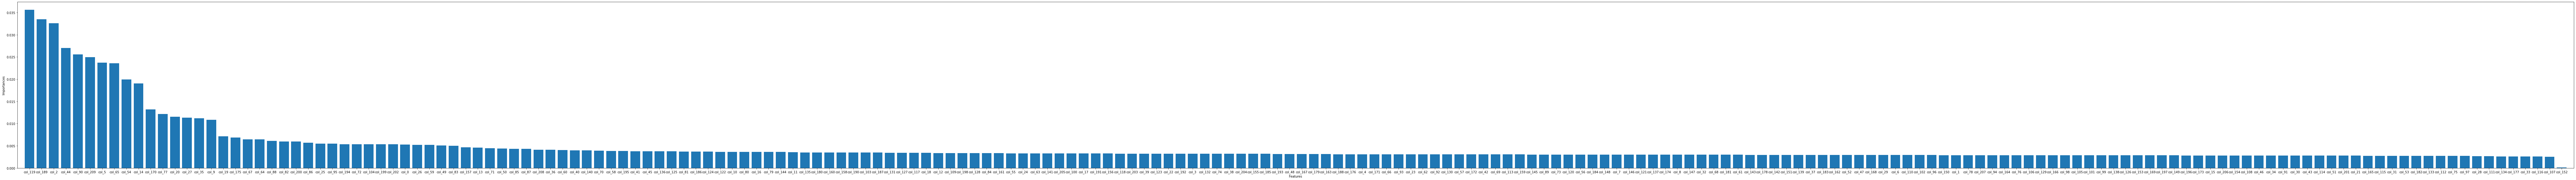

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = model.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure(figsize=(150, 10))
plt.bar(range(X_train.shape[1]), feat_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), ["col_"+str(i) for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.savefig("Feature Importances", bbox_inches='tight')
plt.show()

In [41]:

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# kf.get_n_splits(X)

# for train_index, test_index in kf.split(X):
#   X_train, X_test = X[train_index], X[test_index]
#   y_train, y_test = y[train_index], y[test_index]

In [42]:
# X, y = ttl_data[:, :-1], ttl_data[:, -1]

# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# classifier = RandomForestClassifier(max_depth=2, random_state=10, n_estimators=300)
# classifier.fit(X, y)

# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# print(accuracies)
# print(accuracies.mean())
# print(accuracies.std())

##MLP neural_network

In [43]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())



***CROSS VALIDATION***
[0.79332616 0.81377826 0.82131324 0.82346609 0.82992465 0.80409042
 0.82884822 0.80516685 0.80926724 0.78987069]
accuracy:  0.8119051816933298
0.013347568860222226


In [44]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8186703324168958

f1_score:  0.8025850340136055

Confusion Matrix
[[7203  799]
 [2103 5899]]


##Bagging methods

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bagging, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.78256189 0.79763186 0.79547901 0.80409042 0.79763186 0.78363832
 0.7868676  0.75780409 0.78448276 0.78017241]
accuracy:  0.7870360231617237
0.01235477574621484


In [46]:
y_pred = bagging.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.7976130967258186

f1_score:  0.7808673296799945

Confusion Matrix
[[6994 1008]
 [2231 5771]]


##GradientBoosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.78363832 0.79870829 0.81054898 0.82561895 0.8073197  0.79547901
 0.78902045 0.79870829 0.80926724 0.79741379]
accuracy:  0.8015723015107085
0.011406443697270768


In [48]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8129217695576106

f1_score:  0.7913007109995818

Confusion Matrix
[[7334  668]
 [2326 5676]]


##ExtraTrees

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.78363832 0.7868676  0.76318622 0.80839612 0.79547901 0.79655544
 0.79763186 0.79655544 0.8049569  0.79202586]
accuracy:  0.7925292769384952
0.01202385883086262


In [50]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8009247688077981

f1_score:  0.7779481460830777

Confusion Matrix
[[7237  765]
 [2421 5581]]


##DT

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=4)
clf1.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf1, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.77610334 0.79440258 0.78256189 0.78794403 0.79009688 0.78040904
 0.79440258 0.7911733  0.80387931 0.78340517]
accuracy:  0.7884378131843658
0.007723538077391954


In [52]:
y_pred = clf1.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.7923019245188703

f1_score:  0.7609321058688148

Confusion Matrix
[[7390  612]
 [2712 5290]]


##LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lda, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.82023681 0.82238967 0.81593111 0.82454252 0.81054898 0.80409042
 0.81593111 0.79440258 0.81573276 0.80172414]
accuracy:  0.812553009353773
0.009245630902584586


In [54]:
y_pred = lda.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8181704573856536

f1_score:  0.7960470984020186

Confusion Matrix
[[7415  587]
 [2323 5679]]


##QDA

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = qda, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning:

***CROSS VALIDATION***
[0.49946179 0.49946179 0.49946179 0.49946179 0.50053821 0.50053821
 0.50053821 0.50053821 0.5        0.5       ]
accuracy:  0.5
0.0004813924601721856


/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [56]:
y_pred = qda.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.5

f1_score:  0.6666666666666666

Confusion Matrix
[[   0 8002]
 [   0 8002]]


##SVM

In [57]:
from sklearn.svm import SVC, SVR

classifier = SVC(kernel='rbf', gamma='scale')
classifier.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.79009688 0.82561895 0.82238967 0.84068891 0.82346609 0.81593111
 0.81700753 0.80624327 0.8200431  0.80818966]
accuracy:  0.8169675169815523
0.012782055754492497


In [58]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8272306923269183

f1_score:  0.8094023574825946

Confusion Matrix
[[7368  634]
 [2131 5871]]


##AdaBoost

In [59]:

from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=300)
boost.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = boost, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.76749193 0.80086114 0.80947255 0.81377826 0.8116254  0.80086114
 0.79763186 0.79978471 0.79202586 0.78987069]
accuracy:  0.798340354849486
0.01271722272079469


In [60]:
y_pred = boost.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8070482379405148

f1_score:  0.8005425655600052

Confusion Matrix
[[6719 1283]
 [1805 6197]]


##XGBOOST

In [61]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor

clf = XGBClassifier()
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

print('-'*60)

clf = XGBRFClassifier()
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())



***CROSS VALIDATION***
[0.79332616 0.81377826 0.8320775  0.80947255 0.83100108 0.8073197
 0.81054898 0.7911733  0.80711207 0.7887931 ]
accuracy:  0.8084602696633384
0.01420326214532438
------------------------------------------------------------
***CROSS VALIDATION***
[0.78040904 0.8116254  0.80086114 0.80516685 0.80516685 0.7911733
 0.79763186 0.79547901 0.80926724 0.78340517]
accuracy:  0.7980185869121413
0.009995288265713633


In [62]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8019870032491877

f1_score:  0.769611050527081

Confusion Matrix
[[7542  460]
 [2709 5293]]


##Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=300)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10, scoring='accuracy')
print("***CROSS VALIDATION***")
print(accuracies)
print("mean.accuracy: ", accuracies.mean())
print(accuracies.std())


***CROSS VALIDATION***
[0.7459634  0.75888052 0.7459634  0.74488698 0.74811625 0.73304629
 0.75134553 0.73196986 0.7575431  0.74030172]
mean.accuracy:  0.7458017055788575
0.00854497728597838


In [64]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.7524993751562109

f1_score:  0.6710952420493232

Confusion Matrix
[[8002    0]
 [3961 4041]]


##LightGBM

In [65]:
from lightgbm import LGBMRegressor, LGBMClassifier

clf = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)
clf.fit(X_train_res, y_train_res)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train_res, y = y_train_res, cv = 10)
print("***CROSS VALIDATION***")
print(accuracies)
print("accuracy: ", accuracies.mean())
print(accuracies.std())

***CROSS VALIDATION***
[0.81270183 0.82238967 0.8320775  0.82884822 0.83100108 0.8116254
 0.81808396 0.8116254  0.81357759 0.79633621]
accuracy:  0.8178266860918303
0.01049801463697847


In [66]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
acc = accuracy_score(y_test, y_pred)
print("***INDEPENDENT TEST***")
print("accuracy: ", acc)
print()

f1 = f1_score(y_test, y_pred, average='binary')
print("f1_score: ", f1)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

***INDEPENDENT TEST***
accuracy:  0.8162959260184953

f1_score:  0.8035809727418493

Confusion Matrix
[[7050  952]
 [1988 6014]]


## Init Scorers

In [67]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef
from imblearn.metrics import sensitivity_score, specificity_score

curves = []

def plt_curve(lst, name):
  plt.figure(figsize=(20,10))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
    
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

## SVM CV Scores

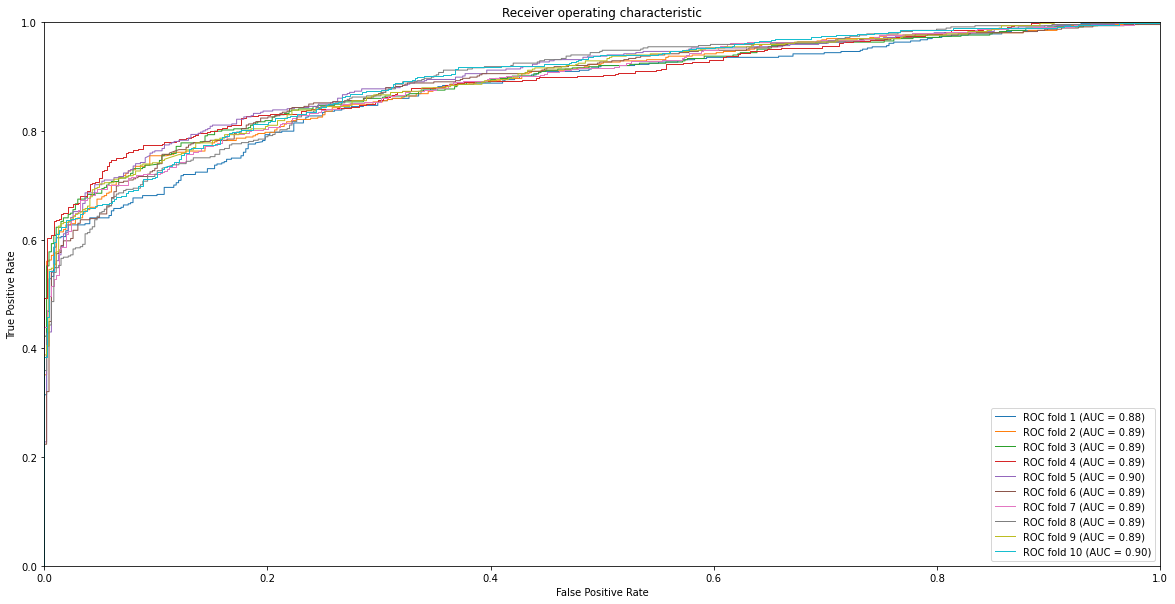

{'fit_time': array([48.94623399, 49.53767014, 50.76459002, 49.42379284, 49.20443797,
        49.285429  , 48.41830611, 49.32841492, 58.44518924, 51.04798603]),
 'score_time': array([1.96727896, 1.9327178 , 1.92629409, 1.99665403, 1.90100408,
        1.8952322 , 1.92411184, 1.90614295, 1.99214292, 2.08632803]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.58395639, 0.66374835, 0.66251715, 0.69388379, 0.66454466,
        0.64618474, 0.6469027 , 0.62667376, 0.65393919, 0.62724728]),
 'test_sensitivity_score': array([0.73275862, 0.72844828, 0.70689655, 0.74568966, 0.70967742,
        0.71182796, 0.71827957, 0.70107527, 0.71767241, 0.71551724]),
 'test_specificity_score': array([0.84731183, 0.92258065, 0.93763441, 0.93548387, 0.9375    ,
        0.92025862, 0.91594828, 0.91163793, 0.92241379, 0.90086207])}

In [68]:
from sklearn.svm import SVC, SVR
classifier = SVC(kernel='rbf', gamma='scale', probability=True)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "SVM CV")
print("***CROSS VALIDATION***")
print("SVM")
scores
#scores['roc']=curves

## XGBoost CV Scores

***CROSS VALIDATION***
SVM


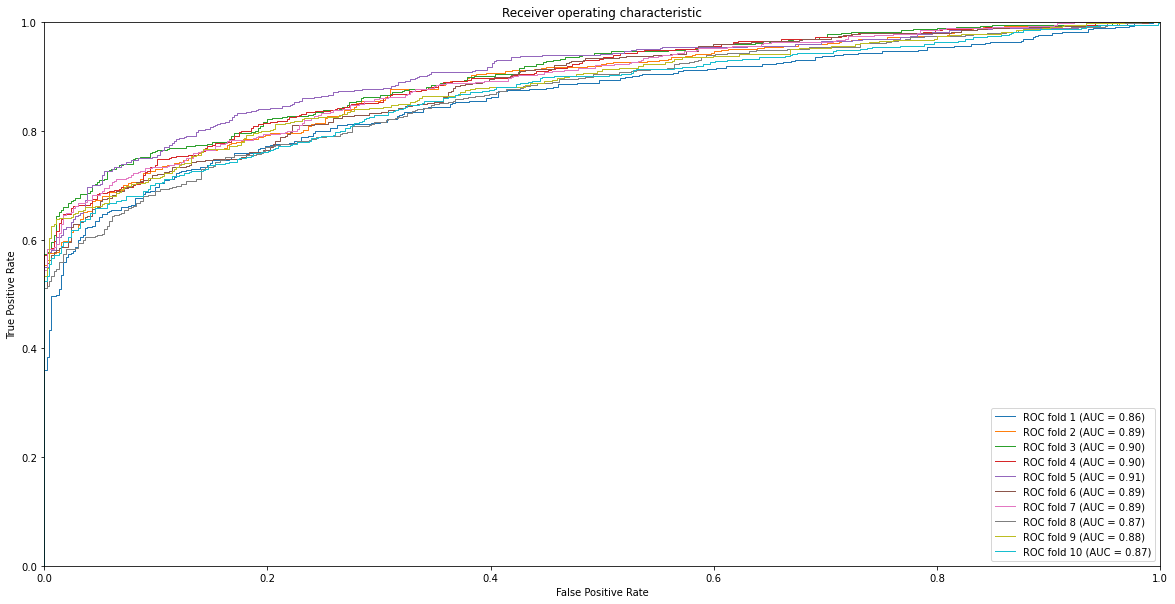

***CROSS VALIDATION***
XGBoost


{'fit_time': array([13.80325198, 13.80266285, 13.45934701, 13.92623878, 13.26628804,
        13.16000628, 13.41051984, 12.89582086, 13.91521192, 13.37747383]),
 'score_time': array([0.0234139 , 0.02081728, 0.02201104, 0.02252412, 0.02007985,
        0.02104497, 0.02031708, 0.01932192, 0.01969528, 0.01956701]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.58801842, 0.63495867, 0.67133673, 0.62183049, 0.66606767,
        0.62159472, 0.62570938, 0.58637329, 0.61618633, 0.58044566]),
 'test_sensitivity_score': array([0.75862069, 0.73706897, 0.75862069, 0.76077586, 0.77634409,
        0.73333333, 0.75053763, 0.73333333, 0.76724138, 0.73922414]),
 'test_specificity_score': array([0.82795699, 0.89032258, 0.90537634, 0.85806452, 0.88577586,
        0.88146552, 0.87068966, 0.84913793, 0.84698276, 0.83836207])}

In [69]:
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
classifier = XGBClassifier()

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "XGBoost CV")
print("***CROSS VALIDATION***")
print("XGBoost")
scores
#scores['roc']=curves

## AdaBoost CV Scores

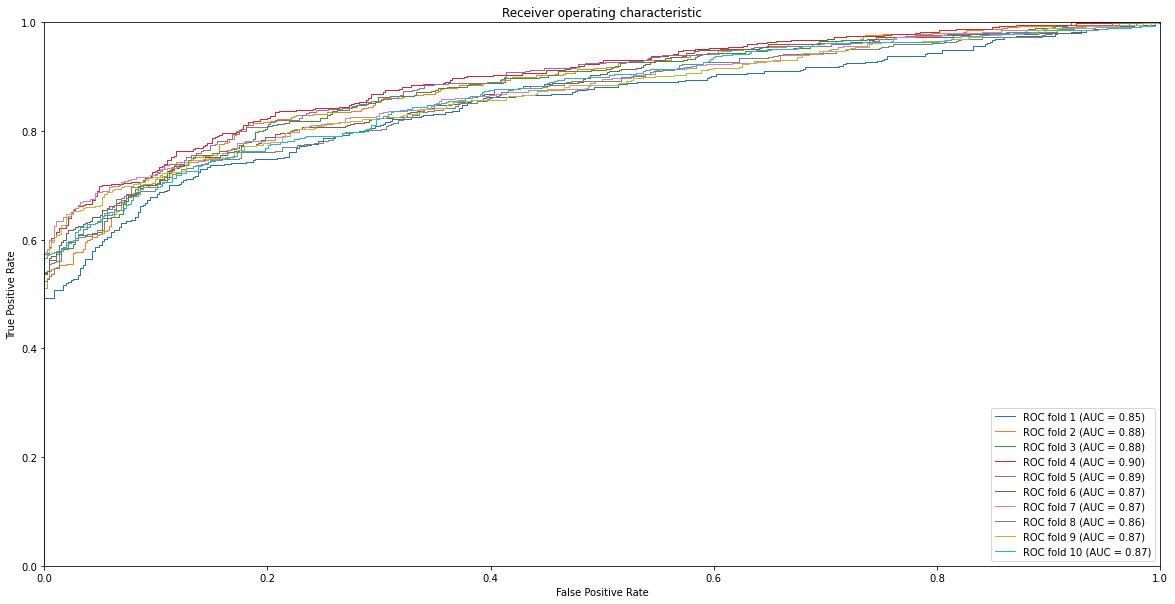

***CROSS VALIDATION***
AdaBoost


{'fit_time': array([48.4471097 , 55.10557795, 48.49459982, 48.47817898, 47.39795923,
        47.04865503, 46.5373342 , 47.02019882, 57.31160188, 46.75741887]),
 'score_time': array([0.3867023 , 0.46096325, 0.36891699, 0.37355089, 0.36535978,
        0.36869597, 0.61983275, 0.36802936, 0.46457601, 0.36645222]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.53528375, 0.60404209, 0.62266503, 0.62952484, 0.62623471,
        0.60542833, 0.59751998, 0.60468913, 0.58591753, 0.5805847 ]),
 'test_sensitivity_score': array([0.75      , 0.75646552, 0.75431034, 0.7737069 , 0.76344086,
        0.74623656, 0.75483871, 0.73548387, 0.75215517, 0.76293103]),
 'test_specificity_score': array([0.78494624, 0.84516129, 0.86451613, 0.85376344, 0.85991379,
        0.85560345, 0.84051724, 0.86422414, 0.83189655, 0.81681034])}

In [70]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "AdaBoost CV")
print("***CROSS VALIDATION***")
print("AdaBoost")
scores
#scores['roc']=curves

## RandomForest CV Scores

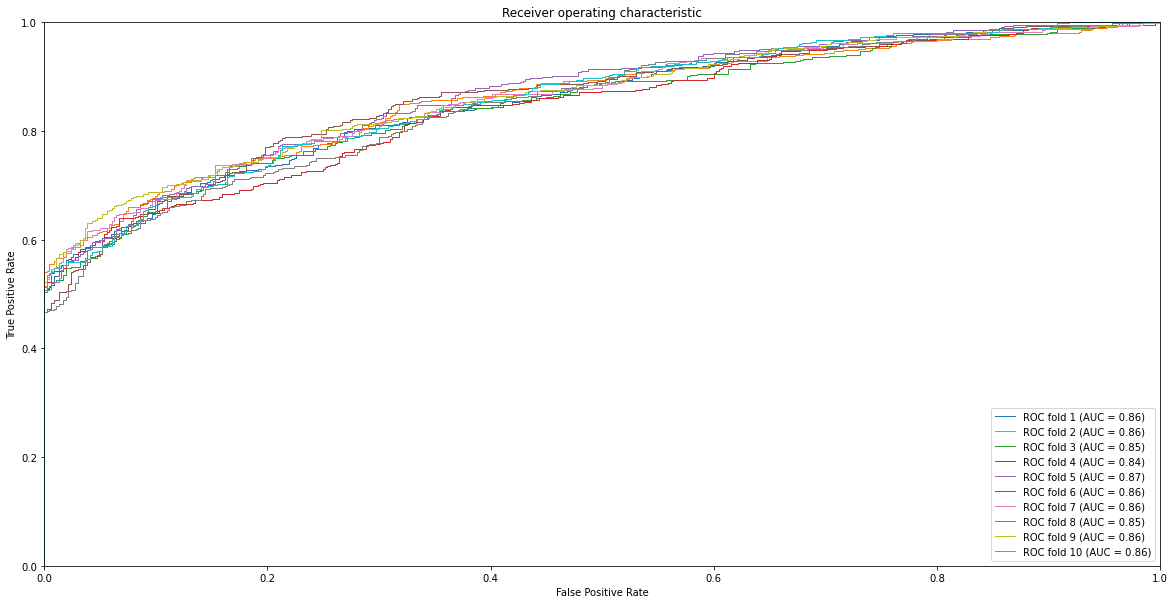

***CROSS VALIDATION***
RandomForest


{'fit_time': array([4.08416104, 3.86783195, 4.01544499, 3.8774941 , 3.86747694,
        4.3319788 , 3.88127899, 4.21859574, 3.78967214, 3.9057858 ]),
 'score_time': array([0.100703  , 0.0981431 , 0.09974813, 0.10014009, 0.09895921,
        0.10914898, 0.09885192, 0.11243606, 0.09564996, 0.09534216]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.56926156, 0.5908313 , 0.57092085, 0.56926156, 0.57465977,
        0.55147062, 0.57962624, 0.54981252, 0.5889648 , 0.56241627]),
 'test_sensitivity_score': array([0.48922414, 0.51724138, 0.49137931, 0.48922414, 0.49677419,
        0.46666667, 0.50322581, 0.46451613, 0.51508621, 0.48060345]),
 'test_specificity_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [71]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=300)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "RandomForest CV")
print("***CROSS VALIDATION***")
print("RandomForest")
scores
#scores['roc']=curves

## LightGBM CV Scores

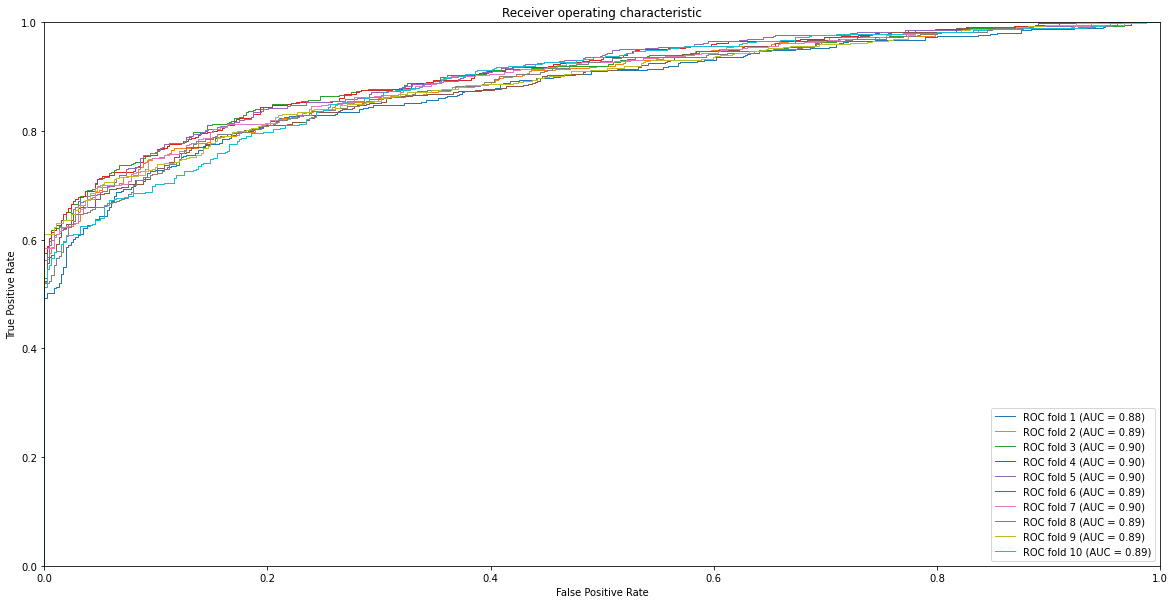

***CROSS VALIDATION***
LightGBM


{'fit_time': array([1.09441209, 1.07588387, 0.96279025, 0.91403389, 0.92027092,
        0.91114497, 0.93543673, 0.90996099, 0.91352606, 0.87965798]),
 'score_time': array([0.01162601, 0.0113771 , 0.01140404, 0.01113486, 0.01120925,
        0.01124096, 0.01139116, 0.01202202, 0.01159596, 0.01156092]),
 'test_roc_plt': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'test_matthews_corrcoef': array([0.63063589, 0.65578677, 0.67811825, 0.6668647 , 0.67134717,
        0.63402631, 0.64716262, 0.63402631, 0.63379743, 0.59857477]),
 'test_sensitivity_score': array([0.74784483, 0.73060345, 0.73060345, 0.74568966, 0.7483871 ,
        0.72043011, 0.72688172, 0.72043011, 0.74137931, 0.7262931 ]),
 'test_specificity_score': array([0.87741935, 0.91397849, 0.93333333, 0.91182796, 0.9137931 ,
        0.90301724, 0.90948276, 0.90301724, 0.88577586, 0.86637931])}

In [72]:
from lightgbm import LGBMRegressor, LGBMClassifier
classifier = LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1)

curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)

plt_curve(curves, "LightGBM CV")
print("***CROSS VALIDATION***")
print("LightGBM")
scores
#scores['roc']=curves

## ROC Comparisons of all Estimators and Average Precision

In [73]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

tprs = []
def plt_curve(lst, name):
  plt.figure(figsize=(10,7))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    tprs.append(interp(np.linspace(0, 1, 100), fpr, tpr))
    tprs[-1][0] = 0.0
#     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Random Guess', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(mean_fpr, mean_tpr, color='b',
         label='% fold cross validation (AUC = %0.2f)' % (mean_auc),
         lw=2, alpha=.8)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

def pr_curve(lst, apLst, name):
  plt.figure(figsize=(10,7))
  
  f_scores = np.linspace(0.2, 0.8, num=4)
  for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))
  
  for idx, itm in enumerate(lst):
    pre, rec = itm
    plt.plot(pre, rec, lw=2, label='Precision-Recall fold %d (AP = %0.2f)' % (idx+1, apLst[idx]))
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def pr_plt(y_true, y_score):
  precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
  pr_curves.append([precision, recall])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'pr_plt': make_scorer(pr_plt, needs_proba=True), 
         'average_precision': make_scorer(average_precision_score, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

***Independent Test***
matthews_corrcoef for SVM:  0.6662235489764258

sensitivity_score for SVM:  0.7336915771057235

specificity_score for SVM:  0.920769807548113

***Independent Test***
matthews_corrcoef for XGBoost:  0.6232502298184875

sensitivity_score for XGBoost:  0.7630592351912022

specificity_score for XGBoost:  0.8574106473381654

***Independent Test***
matthews_corrcoef for AdaBoost:  0.6154072845832567

sensitivity_score for AdaBoost:  0.774431392151962

specificity_score for AdaBoost:  0.8396650837290678

***Independent Test***
matthews_corrcoef for RandomForest:  0.5811983515679059

sensitivity_score for RandomForest:  0.5049987503124219

specificity_score for RandomForest:  1.0

***Independent Test***
matthews_corrcoef for LightGBM:  0.6379611573779175

sensitivity_score for LightGBM:  0.7515621094726318

specificity_score for LightGBM:  0.881029742564359

***Independent Test***
matthews_corrcoef for LDA:  0.6518659773152032

sensitivity_score for LDA:  0.7096975756060

/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


***Independent Test***
matthews_corrcoef for QDA:  0.0

sensitivity_score for QDA:  1.0

specificity_score for QDA:  0.0



/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


***Independent Test***
matthews_corrcoef for Bagging:  0.6031075114021166

sensitivity_score for Bagging:  0.7258185453636591

specificity_score for Bagging:  0.8709072731817046

***Independent Test***
matthews_corrcoef for DT:  0.605838589639596

sensitivity_score for DT:  0.6610847288177956

specificity_score for DT:  0.923519120219945

***Independent Test***
matthews_corrcoef for ET:  0.6151667361070139

sensitivity_score for ET:  0.6974506373406648

specificity_score for ET:  0.9043989002749313

***Independent Test***
matthews_corrcoef for GB:  0.6159427474098027

sensitivity_score for GB:  0.7574356410897276

specificity_score for GB:  0.8555361159710072

***Independent Test***
matthews_corrcoef for MLP:  0.6374216954170092

sensitivity_score for MLP:  0.7773056735816046

specificity_score for MLP:  0.8580354911272182



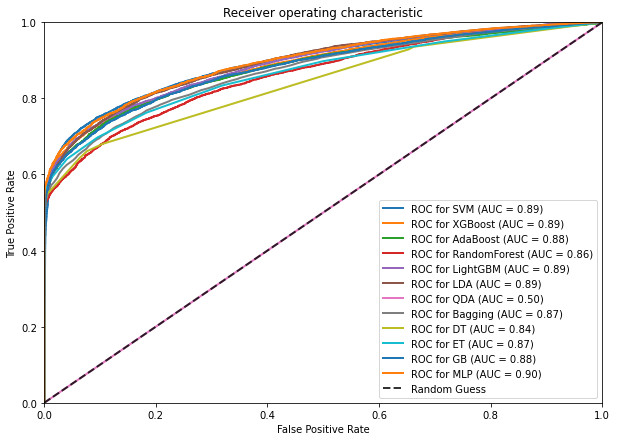

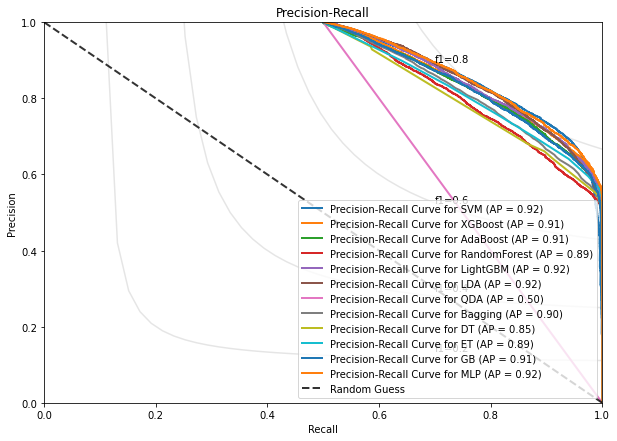

In [74]:
estimators = {"SVM": SVC(kernel='rbf', gamma='scale', probability=True),
              "XGBoost": XGBClassifier(),
              "AdaBoost": AdaBoostClassifier(n_estimators=300),
              "RandomForest": RandomForestClassifier(max_depth=2, random_state=42, n_estimators=300),
              "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
              "LDA": LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
              "QDA": QuadraticDiscriminantAnalysis(store_covariance=True),
              "Bagging": BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
              "DT": DecisionTreeClassifier(max_depth=4),
              "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
              "GB": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
              "MLP": MLPClassifier(alpha=1, max_iter=1000)}

probas_pred = []
avg_pre = []

plt.figure(figsize=(10,7))

for key, clf in estimators.items():
  clf.fit(X_train_res, y_train_res)
  y_pred = clf.predict(X_test)
  y_score = clf.predict_proba(X_test)
  probas_pred.append(y_score)
  avg_pre.append(average_precision_score(y_test, y_score[:, 1], pos_label=1))

  fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(fpr, tpr, lw=2, label='ROC for %s (AUC = %0.2f)' % (key, auc(fpr, tpr)))
  print("***Independent Test***")
  mat_cor_coef = matthews_corrcoef(y_test, y_pred)
  print("matthews_corrcoef for " + key + ": ", mat_cor_coef)
  print()

  sen_scr = sensitivity_score(y_test, y_pred)
  print("sensitivity_score for " + key + ": ", sen_scr)
  print()

  spe_scr = specificity_score(y_test, y_pred)
  print("specificity_score for " + key + ": ", spe_scr)
  print()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
figName = "Compare_All_ROC" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10,7))

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
  x = np.linspace(0.01, 1)
  y = f_score * x / (2 * x - f_score)
  l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
  plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))

keyZ = list(estimators.keys())
for idx, y_score in enumerate(probas_pred):
  pre, rec, _ = precision_recall_curve(y_test, y_score[:, 1], pos_label=1)
  
  plt.plot(pre, rec, lw=2, label='Precision-Recall Curve for %s (AP = %0.2f)' % (keyZ[idx], avg_pre[idx]))
plt.plot([1, 0], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)  
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc="lower right")
figName = "Compare_All_Precision-Recall" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()

## Cross Validation and Independent Test for (SVM)

In [75]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

tprs = []
def plt_curve(lst, name):
  plt.figure(figsize=(20,10))
  
  for idx, itm in enumerate(lst):
    fpr, tpr = itm
    tprs.append(interp(np.linspace(0, 1, 100), fpr, tpr))
    tprs[-1][0] = 0.0
#     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Random Guess', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(mean_fpr, mean_tpr, color='b',
         label='% fold cross validation (AUC = %0.2f)' % (mean_auc),
         lw=2, alpha=.8)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def roc_plt(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
  curves.append([fpr, tpr])
  return 1

def pr_curve(lst, apLst, name):
  plt.figure(figsize=(20,10))
  
  f_scores = np.linspace(0.2, 0.8, num=4)
  for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.7, y[36] + 0.02))
  
  for idx, itm in enumerate(lst):
    pre, rec = itm
    plt.plot(pre, rec, lw=1, label='Precision-Recall fold %d (AP = %0.2f)' % (idx+1, apLst[idx]))
    
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall')
  plt.legend(loc="lower right")
  figName = name + '.png'
  plt.savefig(figName, bbox_inches='tight')
  plt.show()

  
  
def pr_plt(y_true, y_score):
  precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
  pr_curves.append([precision, recall])
  return 1

metrs = {
         'roc_plt': make_scorer(roc_plt, needs_proba=True), 
         'pr_plt': make_scorer(pr_plt, needs_proba=True), 
         'average_precision': make_scorer(average_precision_score, needs_proba=True), 
         'matthews_corrcoef': make_scorer(matthews_corrcoef), 
         'sensitivity_score': make_scorer(sensitivity_score), 
         'specificity_score': make_scorer(specificity_score)
        }

/var/folders/bz/ghqqnzyn4r7g7r3ypg9343640000gn/T/ipykernel_9031/1153157546.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


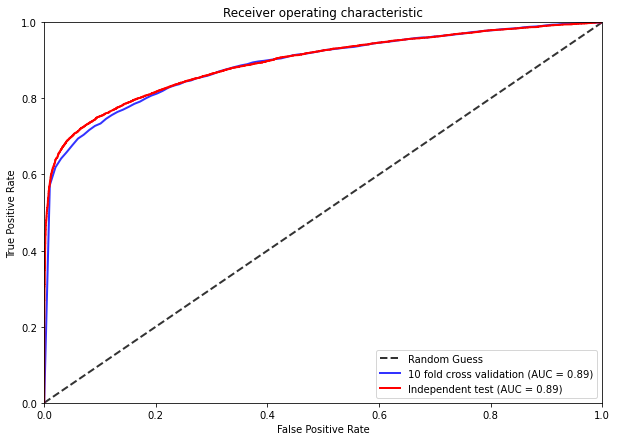

In [76]:
from sklearn.svm import SVC, SVR
classifier = SVC(kernel='rbf', gamma='scale', probability=True)

curves = []
pr_curves = []

scores = cross_validate(classifier, 
                        X_train_res, 
                        y_train_res, 
                        cv=10,
                        scoring=metrs,
                        return_train_score=False)


tprs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,7))

for idx, itm in enumerate(curves):
  fpr, tpr = itm
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
#     plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (idx+1, auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
       label='Random Guess', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b',
       label='10 fold cross validation (AUC = %0.2f)' % (mean_auc),
       lw=2, alpha=.8)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
plt.plot(fpr, tpr, lw=2, color='r', label='Independent test (AUC = %0.2f)' % (auc(fpr, tpr)))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
figName = "SVM ROC(Cross val and Independent)" + '.png'
plt.savefig(figName, bbox_inches='tight')
plt.show()


#plt_curve(curves, "SVM ROC CV")
#pr_curve(pr_curves, scores['test_average_precision'], "SVM PR CV")
#scores
#scores['roc']=curves

##Cross Validation Curve

SVC
Accuracy: 81.8368 %
auROC: 0.891021
auPR: 0.9165
F1-score: 0.7981
MCC: 0.6501
Recall: 0.7181
Sensitivity (+): 71.8131 %
Specificity (-): 91.8605 %
Confusion Matrix:
[[4266  378]
 [1309 3335]]
_______________________________________
XGBClassifier
Accuracy: 81.4492 %
auROC: 0.887411
auPR: 0.9157
F1-score: 0.8016
MCC: 0.6346
Recall: 0.7496
Sensitivity (+): 74.9569 %
Specificity (-): 87.9414 %
Confusion Matrix:
[[4084  560]
 [1163 3481]]
_______________________________________
AdaBoostClassifier
Accuracy: 80.3940 %
auROC: 0.874393
auPR: 0.9059
F1-score: 0.7929
MCC: 0.6115
Recall: 0.7504
Sensitivity (+): 75.0431 %
Specificity (-): 85.7450 %
Confusion Matrix:
[[3982  662]
 [1159 3485]]
_______________________________________
RandomForestClassifier
Accuracy: 74.5695 %
auROC: 0.855645
auPR: 0.8895
F1-score: 0.6585
MCC: 0.5707
Recall: 0.4914
Sensitivity (+): 49.1387 %
Specificity (-): 100.0000 %
Confusion Matrix:
[[4644    0]
 [2362 2282]]
_______________________________________
LGBMClassif

/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wakilahmad/opt/anaconda3/lib/python3.9/site

Accuracy: 50.0000 %
auROC: 0.500000
auPR: 0.5000
F1-score: 0.6667
MCC: 0.0000
Recall: 1.0000
Sensitivity (+): 100.0000 %
Specificity (-): 0.0000 %
Confusion Matrix:
[[   0 4644]
 [   0 4644]]
_______________________________________
BaggingClassifier
Accuracy: 79.0913 %
auROC: 0.863821
auPR: 0.8940
F1-score: 0.7744
MCC: 0.5883
Recall: 0.7179
Sensitivity (+): 71.7916 %
Specificity (-): 86.3910 %
Confusion Matrix:
[[4012  632]
 [1310 3334]]
_______________________________________
DecisionTreeClassifier
Accuracy: 78.8867 %
auROC: 0.835629
auPR: 0.8439
F1-score: 0.7520
MCC: 0.6052
Recall: 0.6406
Sensitivity (+): 64.0612 %
Specificity (-): 93.7123 %
Confusion Matrix:
[[4352  292]
 [1669 2975]]
_______________________________________
ExtraTreesClassifier
Accuracy: 79.7373 %
auROC: 0.859411
auPR: 0.8823
F1-score: 0.7723
MCC: 0.6098
Recall: 0.6882
Sensitivity (+): 68.8200 %
Specificity (-): 90.6546 %
Confusion Matrix:
[[4210  434]
 [1448 3196]]
_______________________________________
GradientBo

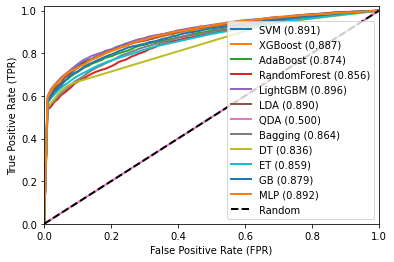

In [77]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_curve, auc, matthews_corrcoef, precision_recall_curve, average_precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from scipy import interp

def auROCplot():
    ### auROC ###
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Random')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    # plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')

    plt.savefig('cvAuROC.png', dpi=100)
    plt.show()
    ### --- ###

    
def runAll(X, y):
    Names = []
    Classifiers = []
    estimators = {"SVM": SVC(kernel='rbf', gamma='scale', probability=True),
                  "XGBoost": XGBClassifier(),
                  "AdaBoost": AdaBoostClassifier(n_estimators=300),
                  "RandomForest": RandomForestClassifier(max_depth=2, random_state=42, n_estimators=300),
                  "LightGBM": LGBMClassifier(num_leaves=31, n_estimators=40, learning_rate=0.1),
                  "LDA": LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
                  "QDA": QuadraticDiscriminantAnalysis(store_covariance=True),
                  "Bagging": BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
                  "DT": DecisionTreeClassifier(max_depth=4),
                  "ET": ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0),
                  "GB": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
                  "MLP": MLPClassifier(alpha=1, max_iter=1000)}

    for key, value in estimators.items():
        Names.append(key)
        Classifiers.append(value)

    Results = []  # compare algorithms

    from sklearn.metrics import accuracy_score, \
        confusion_matrix, \
        roc_auc_score,\
        average_precision_score,\
        roc_curve, f1_score, recall_score, matthews_corrcoef, auc

    # Step 05 : Spliting with 10-FCV :
    from sklearn.model_selection import StratifiedKFold

    cv = StratifiedKFold(n_splits=10, shuffle=True)

    for classifier, name in zip(Classifiers, Names):

        accuray = []
        auROC = []
        avePrecision = []
        F1_Score = []
        AUC = []
        MCC = []
        Recall = []

        mean_TPR = 0.0
        mean_FPR = np.linspace(0, 1, 100)

        CM = np.array([
            [0, 0],
            [0, 0],
        ], dtype=int)

        print(classifier.__class__.__name__)

        model = classifier
        for (train_index, test_index) in cv.split(X, y):

            X_train = X[train_index]
            X_test = X[test_index]

            y_train = y[train_index]
            y_test = y[test_index]

            model.fit(X_train, y_train)


            # Calculate ROC Curve and Area the Curve
            y_proba = model.predict_proba(X_test)[:, 1]
            FPR, TPR, _ = roc_curve(y_test, y_proba)
            mean_TPR += np.interp(mean_FPR, FPR, TPR)
            mean_TPR[0] = 0.0
            roc_auc = auc(FPR, TPR)
            ##########################################
            # print(FPR)
            # print(TPR)
            ##########################################

            y_artificial = model.predict(X_test)

            auROC.append(roc_auc_score(y_test, y_proba))

            accuray.append(accuracy_score(y_pred=y_artificial, y_true=y_test))
            avePrecision.append(average_precision_score(y_test, y_proba)) # auPR
            F1_Score.append(f1_score(y_true=y_test, y_pred=y_artificial))
            MCC.append(matthews_corrcoef(y_true=y_test, y_pred=y_artificial))
            Recall.append(recall_score(y_true=y_test, y_pred=y_artificial))
            AUC.append(roc_auc)

            CM += confusion_matrix(y_pred=y_artificial, y_true=y_test)

        accuray = [_*100.0 for _ in accuray]
        Results.append(accuray)

        mean_TPR /= cv.get_n_splits(X, y)
        mean_TPR[-1] = 1.0
        mean_auc = auc(mean_FPR, mean_TPR)
        plt.plot(
            mean_FPR,
            mean_TPR,
            linestyle='-',
            label='{} ({:0.3f})'.format(name, mean_auc), lw=2.0)

        print('Accuracy: {0:.4f} %'.format(np.mean(accuray)))
        # print('auROC: {0:.6f}'.format(np.mean(auROC)))
        print('auROC: {0:.6f}'.format(mean_auc))
        print('auPR: {0:.4f}'.format(np.mean(avePrecision))) # average_Precision
        print('F1-score: {0:.4f}'.format(np.mean(F1_Score)))
        print('MCC: {0:.4f}'.format(np.mean(MCC)))
        # print('average_AUC:', np.mean(AUC))
        # tn, fp, fn, tp = CM.ravel()
        TN, FP, FN, TP = CM.ravel()
        print('Recall: {0:.4f}'.format( np.mean(Recall)) )
        # print('AUC: {0:.4f}'.format( np.mean(AUC)) )
        print('Sensitivity (+): {0:.4f} %'.format( float( (TP) / (TP + FN) )*100.0 ))
        print('Specificity (-): {0:.4f} %'.format( float( (TN) / (TN + FP) )*100.0 ))
        print('Confusion Matrix:')
        print(CM)

        print('_______________________________________')

    ### auROC Curve ###
    auROCplot()

    
runAll(X_train_res, y_train_res)